In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score




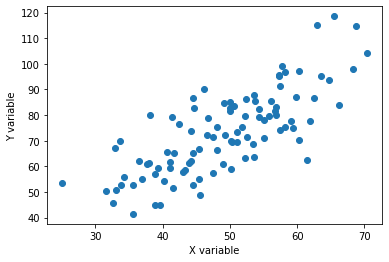

In [2]:
# Preprocessing Input data
data = pd.read_csv('data_new.csv')
data.head()
#deviding data in 2 parts  where y is responce variable and X is predictor variable
X = data.iloc[:, 0]
y = data.iloc[:, 1]
# display of xy variables
plt.xlabel('X variable')
plt.ylabel('Y variable')
plt.scatter(X, y)
plt.show()

In [22]:
#functions for closed form solution
def coef_estimation(x, y):
  n = np.size(x)
  m_x, m_y = np.mean(x), np.mean(y)
  SS_xy=n*np.sum(y*x) - np.sum(x)* np.sum(y)
  SS_xx = n *np.sum(x*x) - np.sum(x)*np.sum(x)
  #SS_xy = np.sum(y*x) - n*m_y*m_x
  #SS_xx = np.sum(x*x) - n*m_x*m_x
  b_1 = SS_xy / SS_xx
  b_0 = (np.sum(y)*np.sum(x*x) - np.sum(x)*np.sum(x*y))/ SS_xx
  return(b_0, b_1)

def plot_regression_line(x, y, b):
  plt.scatter(x, y, color = "m", marker = "o", s = 30)
  y_pred = b[0] + b[1]*x
  plt.plot(x, y_pred, color = "g")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

def closed_form():
 
   b = coef_estimation(X, y)
   y_pred = b[1]*X + b[0]
   print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
   print('b=', b)
   print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1]))
   plot_regression_line(X, y, b)





In [9]:
# Building the model linear gradient descent
def Linear_gradient(X, y, L, epochs):
 m = 0
 c = 0

#L is the learning Rate
#epochs is  the number of iterations to perform gradient descent

 n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
 for i in range(epochs): 
    y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (y - y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
 return m, c



In [12]:
# Making predictions
def Make_prediction(X,y,m,c):
 y_pred = m*X + c
 print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
  
 
 print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(m, c))

 plt.scatter(X, y)

 plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red') 
 #plt.show()

Closed form solution
Mean squared error: 107.47
b= (9.908606193482779, 1.2873573699494347)
Estimated coefficients:
b_0 = 9.908606193482779 
b_1 = 1.2873573699494347


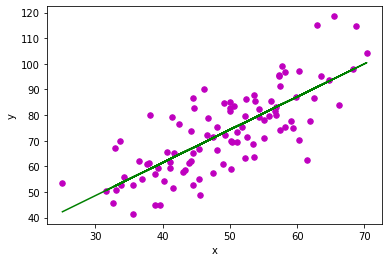

Gradient Descent solution
Mean squared error: 111.01
Estimated coefficients:
b_0 = 1.4796491688881985 
b_1 = 0.10148121497503648


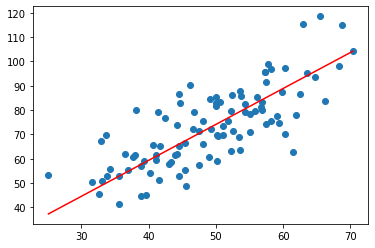

In [23]:
print('Closed form solution')
closed_form()
print('Gradient Descent solution')
m, c=Linear_gradient(X, y, 0.0001, 1000)
Make_prediction(X,y, m, c)
